In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from numpy import sqrt
from numpy import log  
import matplotlib.pyplot as plt
from matplotlib import pyplot  
import seaborn as sn
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas import DataFrame 
from pandas import Grouper
from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing  

In [ ]:
data=pd.read_csv("Gold_data.csv",parse_dates=['date'], index_col='date')  

In [ ]:
data

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


In [ ]:
data.shape

(2182, 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2016-01-01 to 2021-12-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2182 non-null   float64
dtypes: float64(1)
memory usage: 34.1 KB


In [ ]:
data.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [ ]:
data.isnull().sum()

price    0
dtype: int64

<Axes: xlabel='date'>

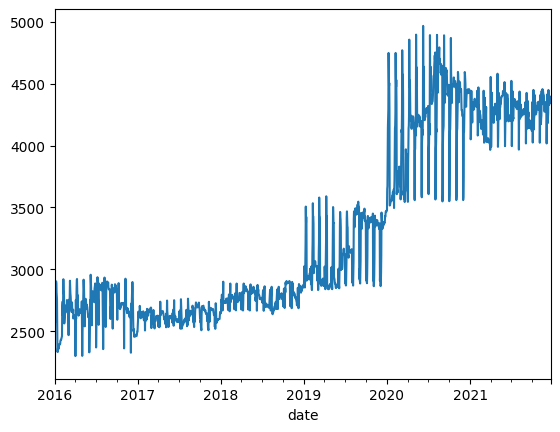

In [ ]:
data.price.plot()

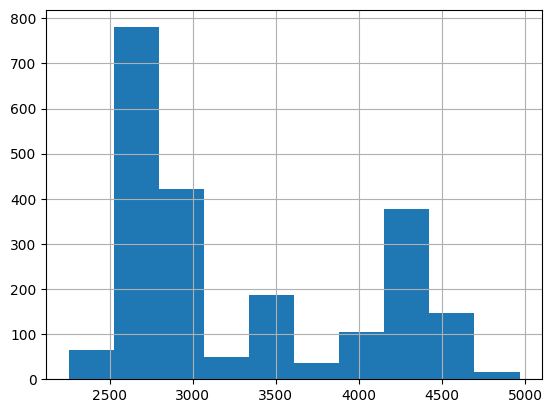

In [ ]:
data.price.hist()
pyplot.show()

<Axes: >

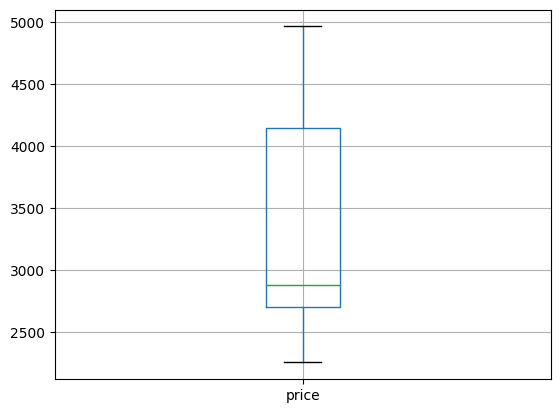

In [ ]:
data.boxplot(column=['price'])

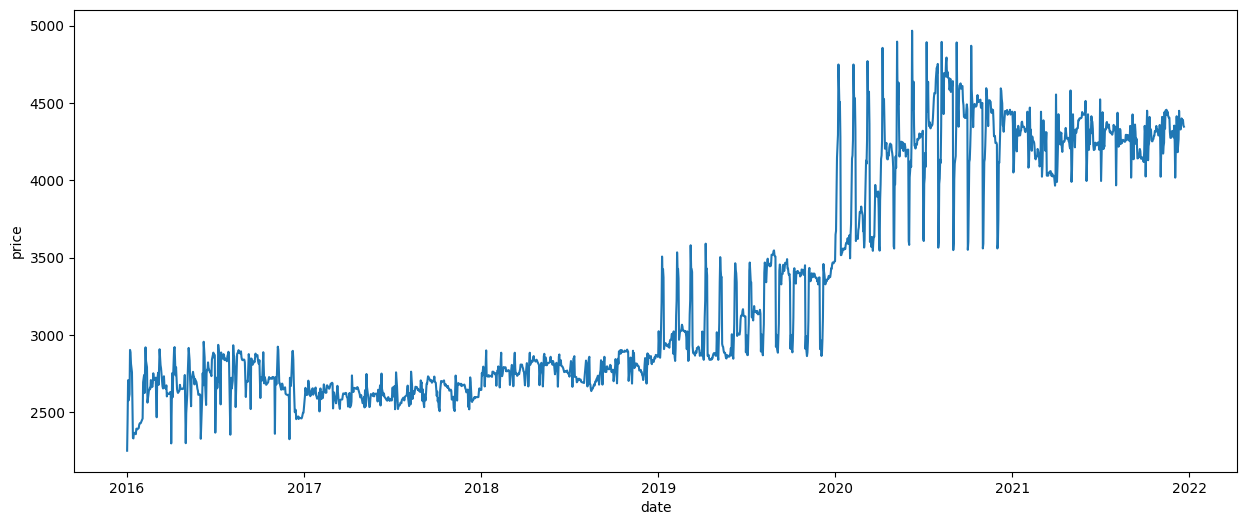

In [ ]:
plt.figure(figsize=(15,6))
series=sn.lineplot(x='date',y='price',data=data)
plt.show(series)

### Obs: Price increase at the start of month and reduces towards the end of month


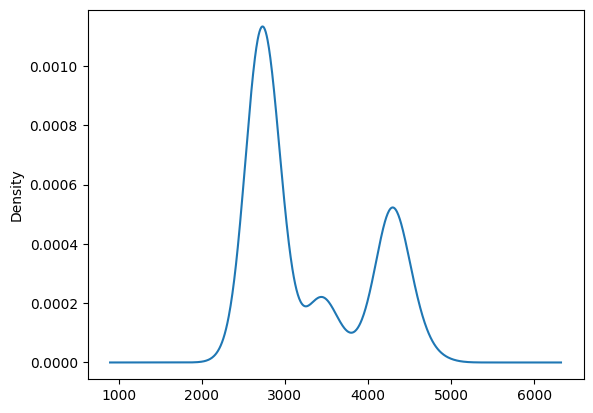

In [ ]:
data.price.plot(kind="kde")
pyplot.show()

###  Observation: In last 5years, price of gold was more between 2500/- to 2750/-

<Axes: xlabel='date'>

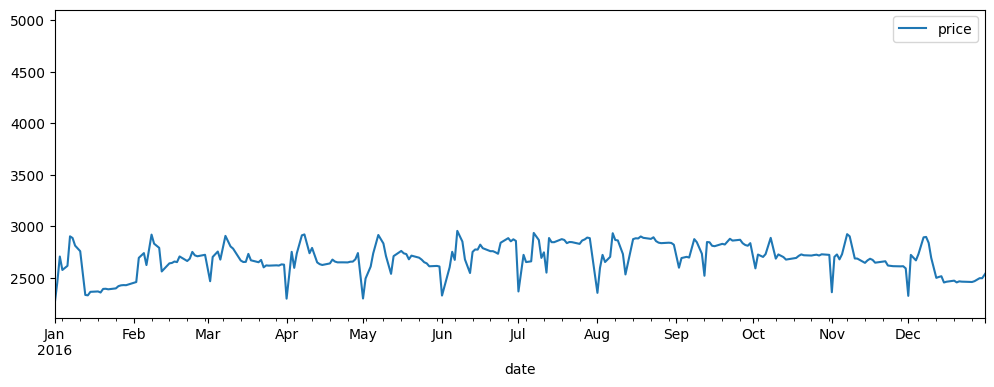

In [ ]:
data.plot(xlim=['2016-01-01','2016-12-31'],figsize=(12,4)) # line plot for 2016

<Axes: xlabel='date'>

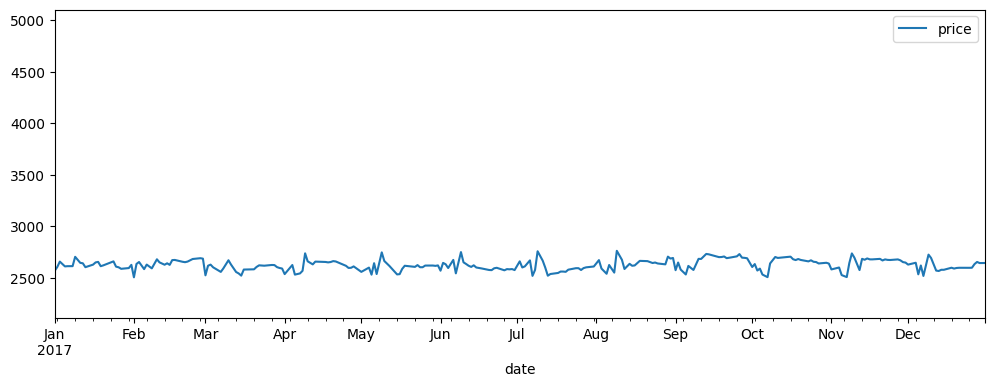

In [ ]:
data.plot(xlim=['2017-01-01','2017-12-31'],figsize=(12,4)) # line plot for 2016

<Axes: xlabel='date'>

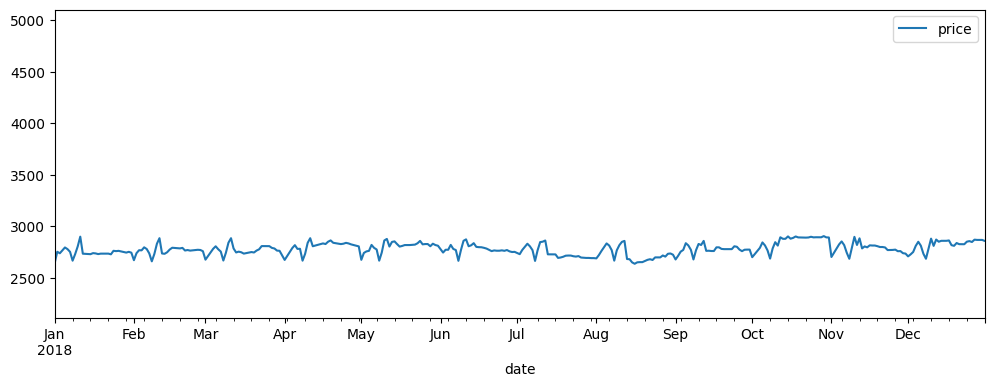

In [ ]:
data.plot(xlim=['2018-01-01','2018-12-31'],figsize=(12,4)) # line plot for 2016

<Axes: xlabel='date'>

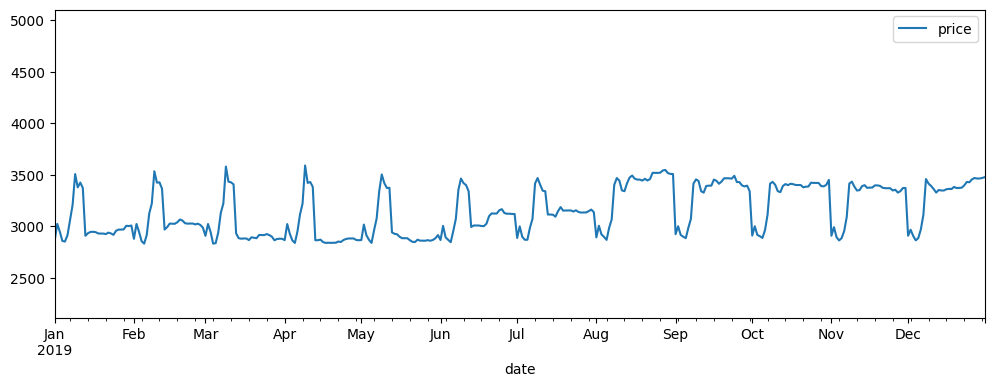

In [ ]:
data.plot(xlim=['2019-01-01','2019-12-31'],figsize=(12,4)) # line plot for 2016

<Axes: xlabel='date'>

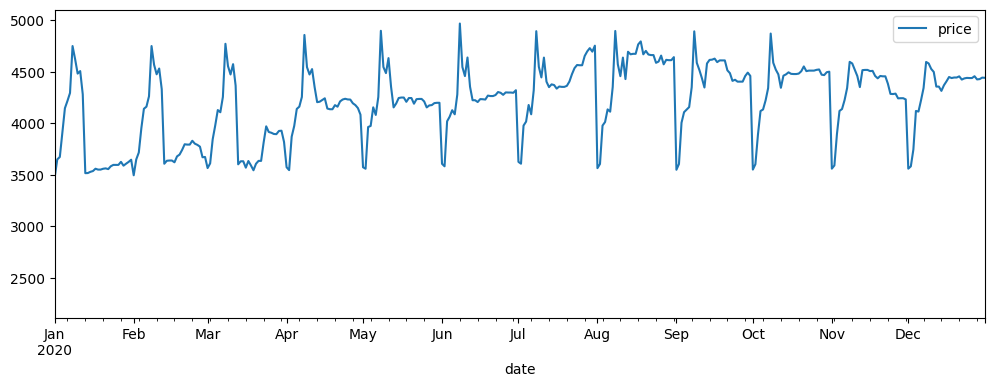

In [ ]:
data.plot(xlim=['2020-01-01','2020-12-31'],figsize=(12,4)) # line plot for 2016

<Axes: xlabel='date'>

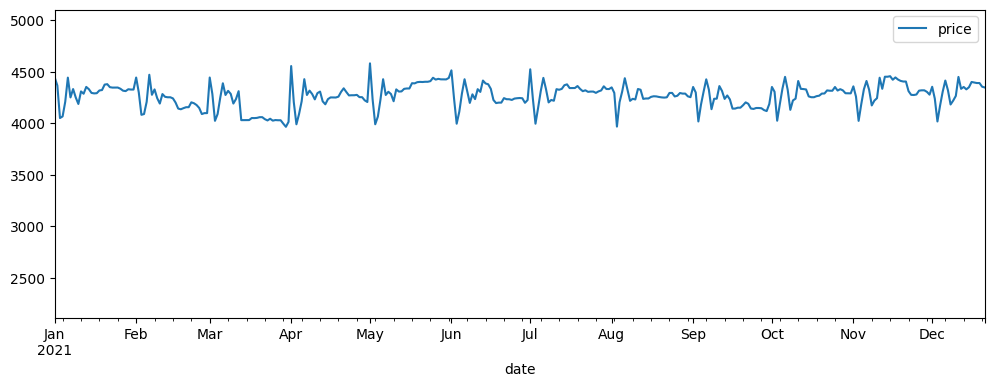

In [ ]:
data.plot(xlim=['2021-01-01','2021-12-21'],figsize=(12,4)) # line plot for 2016

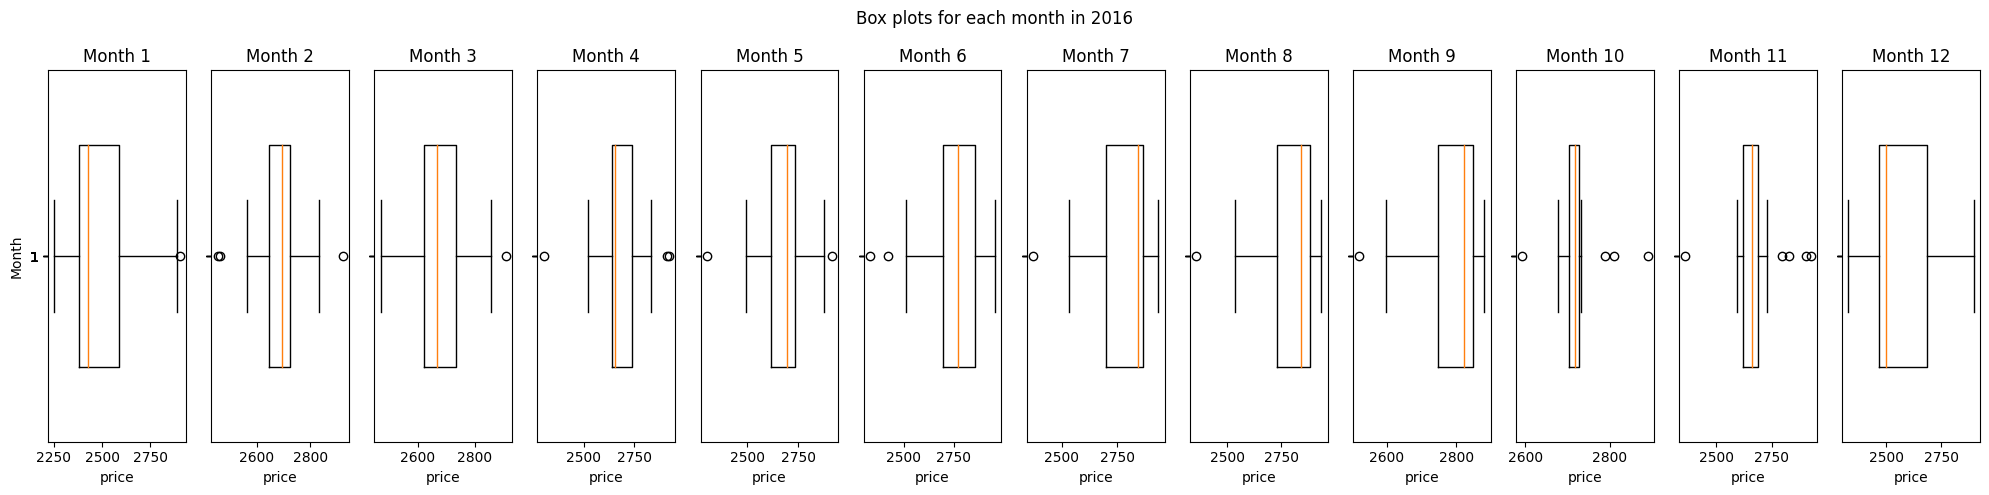

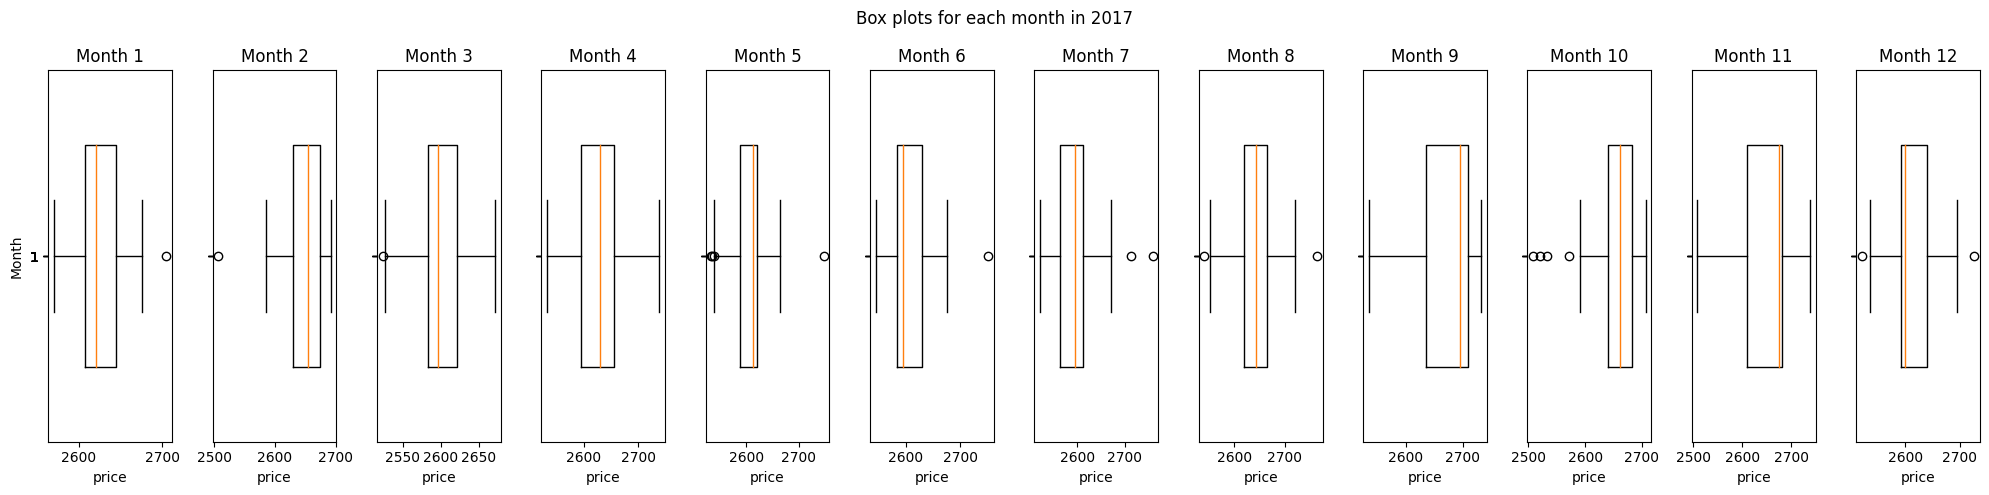

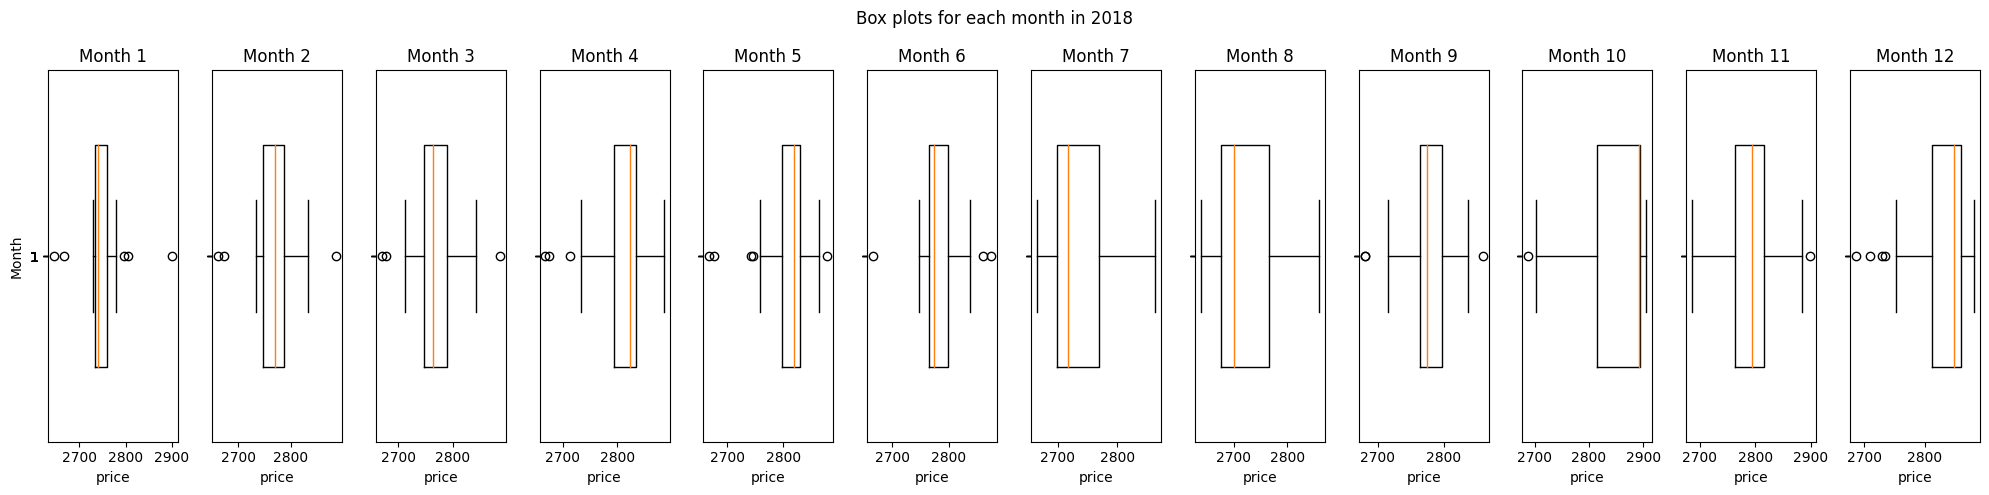

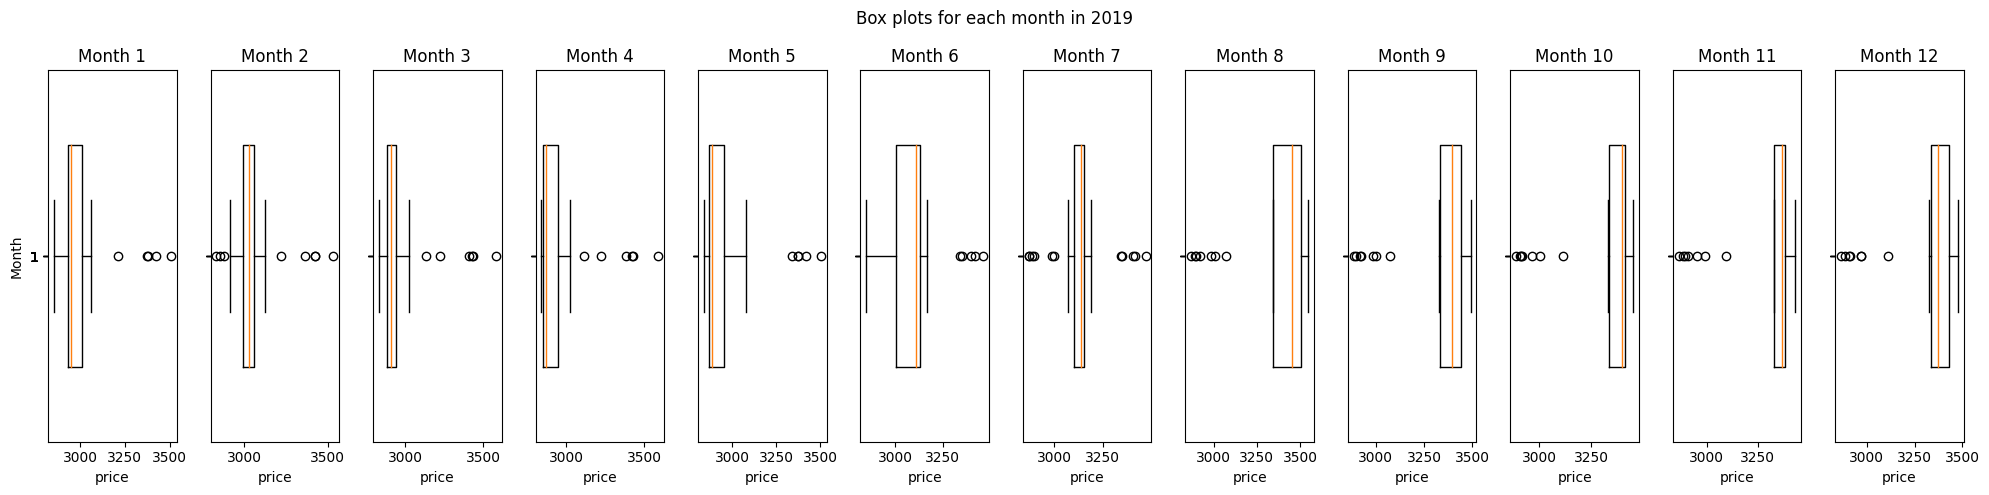

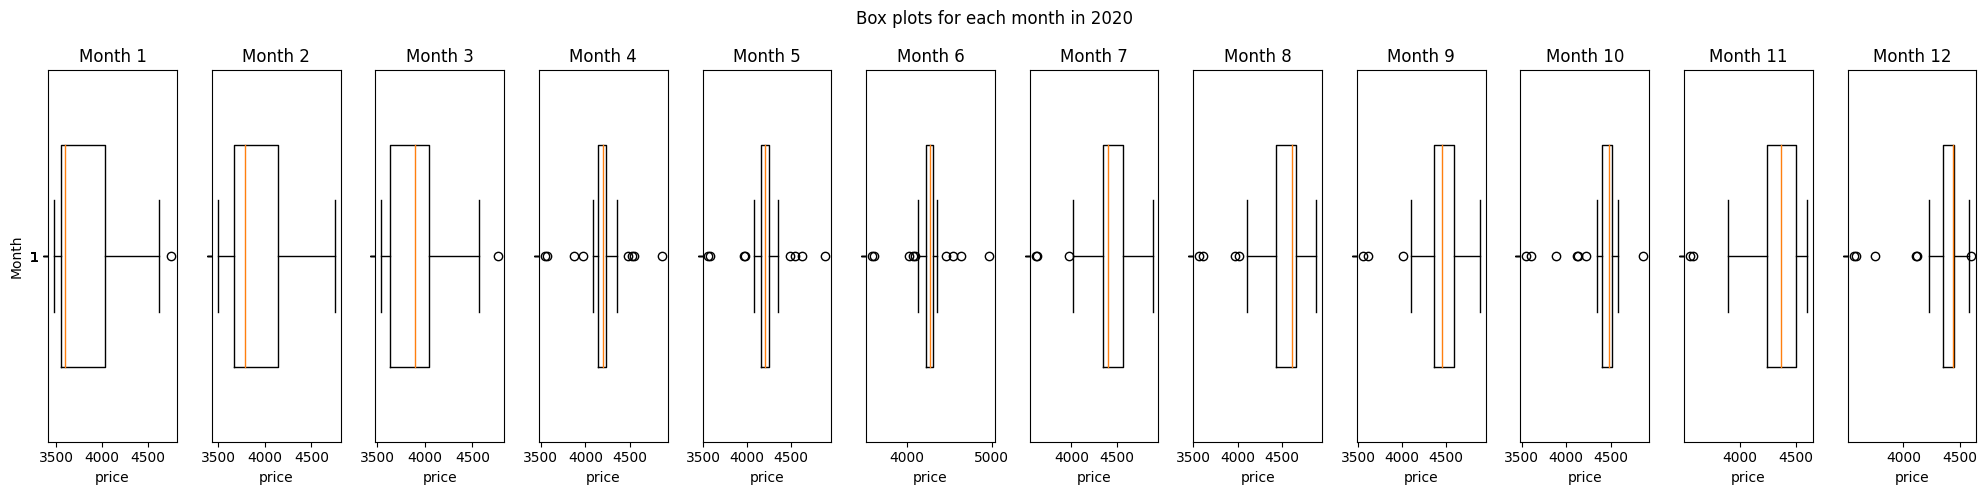

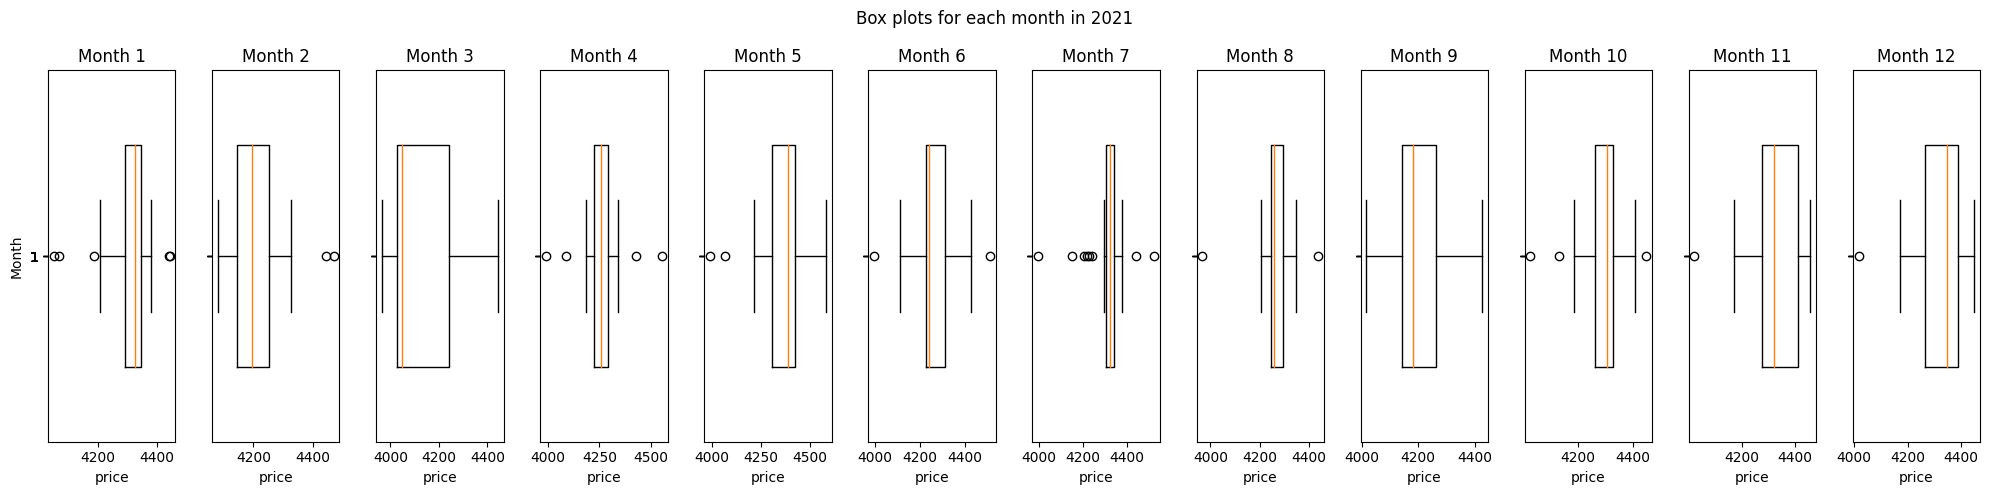

In [ ]:
# loop through each year and generate one plot with all 12 months' boxplots
for year in data.index.year.unique():
    # create a list to hold the data for each month
    month_data = [data[(data.index.year==year) & (data.index.month==month)]['price'] for month in range(1,13)]
    
    # create a figure with subplots for each month
    fig, axs = plt.subplots(nrows=1, ncols=12, figsize=(20, 5), sharey=True)
    fig.suptitle(f'Box plots for each month in {year}')
    
    # plot the boxplots for each month
    for i, ax in enumerate(axs.flatten()):
        ax.boxplot(month_data[i], widths=0.6, vert=False)
        ax.set_title(f'Month {i+1}')
        ax.set_xlabel('price')
    
    # set the y-axis label for the first subplot
    axs[0].set_ylabel('Month')
    
    plt.tight_layout()
    plt.show()


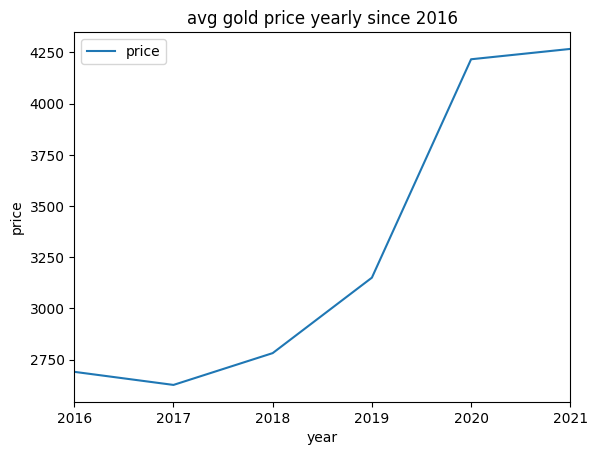

In [ ]:
data_yearly_sum = data.resample('A').mean()
data_yearly_sum.plot();
plt.title("avg gold price yearly since 2016")
plt.xlabel("year")
plt.ylabel("price")
plt.show()

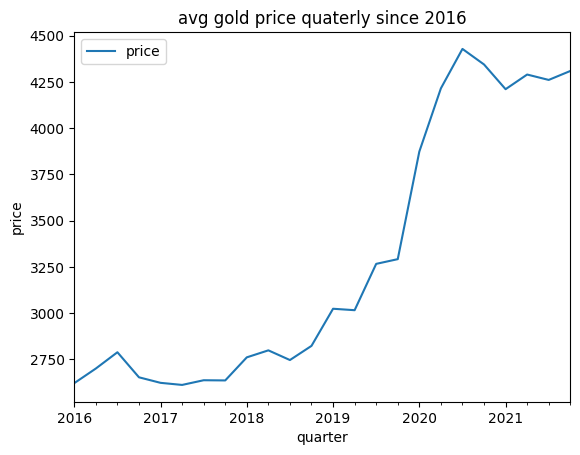

In [ ]:
data_quarterly_sum = data.resample("Q").mean()
data_quarterly_sum.plot();
plt.title('avg gold price quaterly since 2016')
plt.xlabel('quarter')
plt.ylabel('price')
plt.show();

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose 

In [ ]:
df2 =data.loc['2016-01-01':'2016-12-31'] 

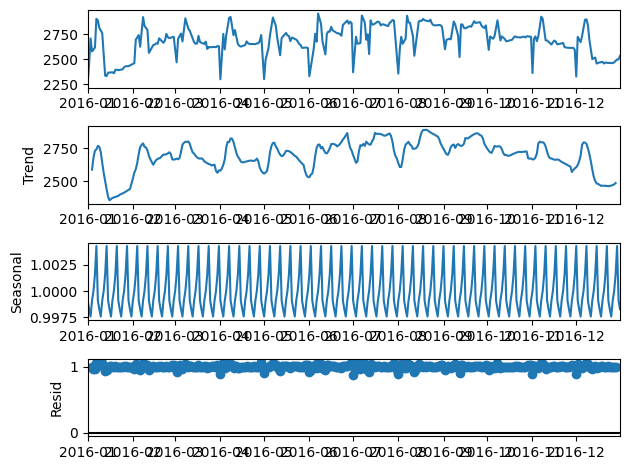

In [ ]:
decompose_result_mult = seasonal_decompose(df2, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot()
pyplot.show()

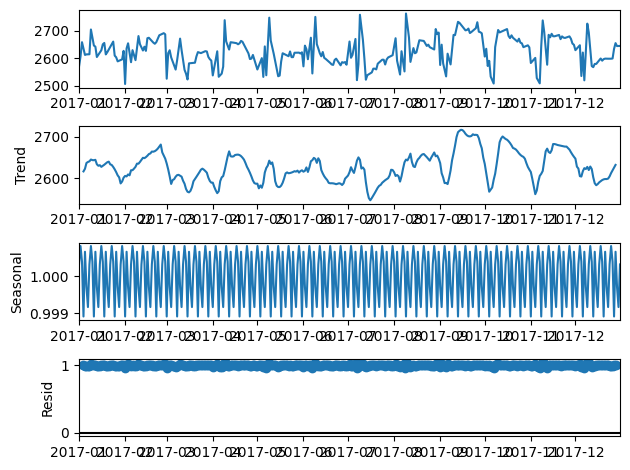

In [ ]:
df3 =data.loc['2017-01-01':'2017-12-31'] 

decompose_result_mult = seasonal_decompose(df3, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot()
pyplot.show()

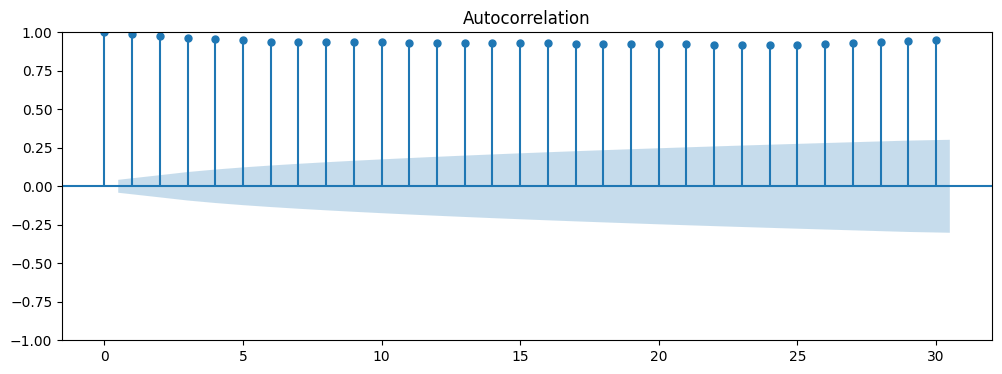

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_acf(data,lags=30,ax=ax)
pyplot.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


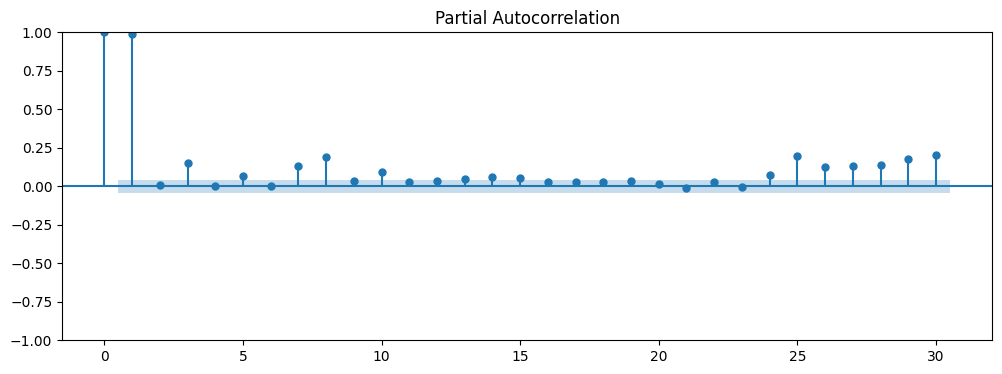

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_pacf(data,lags=30,ax=ax)
pyplot.show()

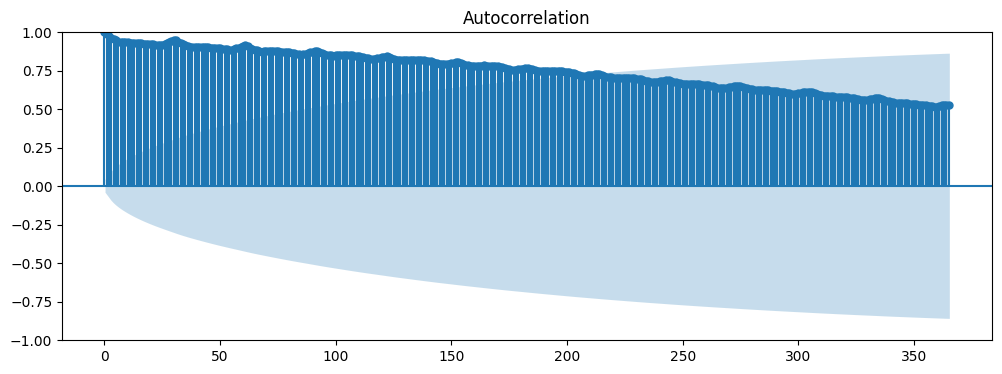

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_acf(data,lags=365,ax=ax)
pyplot.show() 

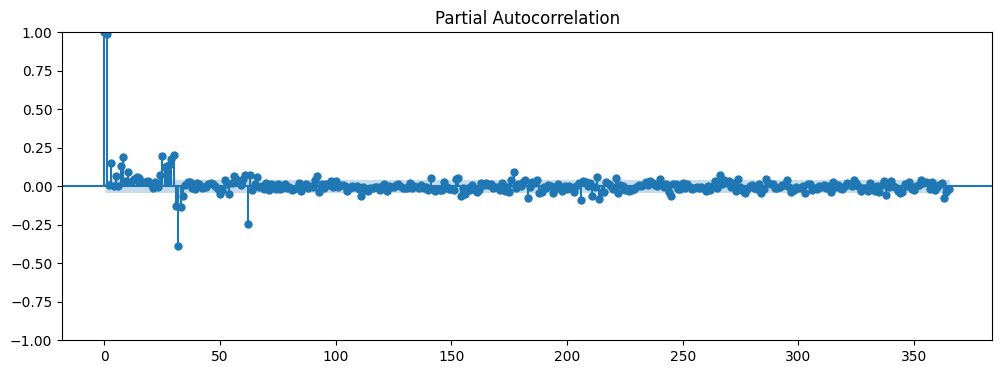

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_pacf(data,lags=365,ax=ax)
pyplot.show() 

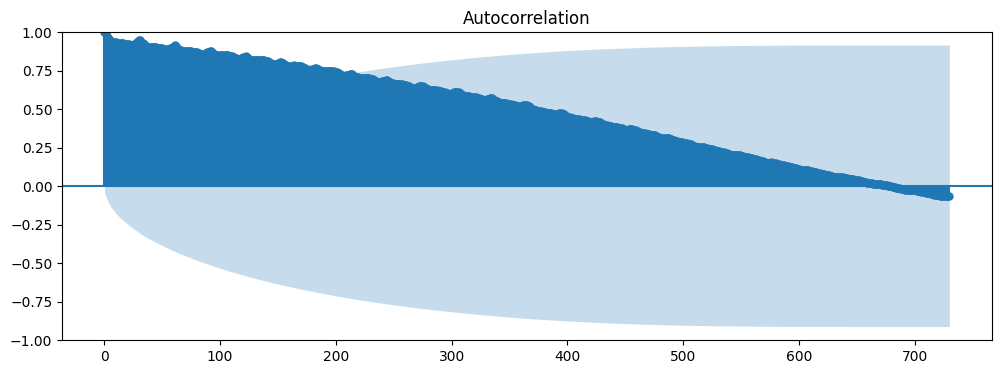

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_acf(data,lags=730,ax=ax)
pyplot.show() 

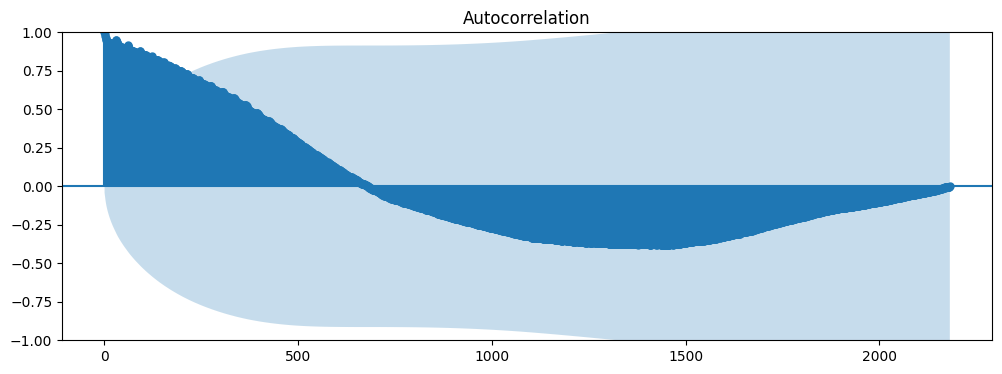

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_acf(data,lags=2181,ax=ax)
pyplot.show() 

# Testing for Stationarity 

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(data['price'])

In [ ]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(price):
  result=adfuller(price)
  labels = ['ADF Test Statistic','p-value','Lags Used','Number of Observation Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print('strong evidence against the null hypothesis(H0), reject the null hypothesis, Data has no unit root and is stationary')
  else:
    print('weak evidence against null hypothesis, time series has a unit root, indicating it is non stationary')

In [ ]:
adfuller_test(data['price'])

ADF Test Statistic : -0.30990365705047584
p-value : 0.9240899189079189
Lags Used : 26
Number of Observation Used : 2155
weak evidence against null hypothesis, time series has a unit root, indicating it is non stationary


applying transformations to convert non-stationary to stationary 

In [ ]:
# square root 
from matplotlib import pyplot  

dataframe_s = DataFrame(data.values)
dataframe_s.columns = ['price']
dataframe_s['price'] = sqrt(dataframe_s['price'])

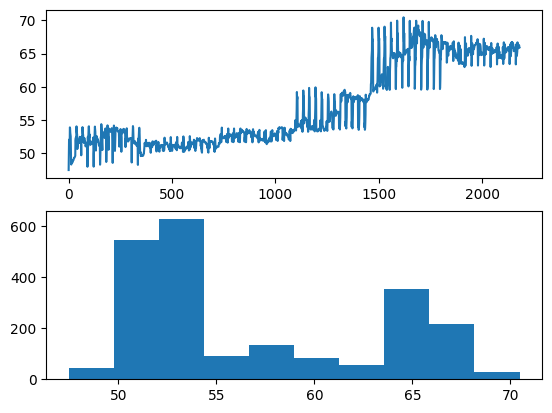

In [ ]:
# line plot 2 - rows , 1- colums , 1 visualaisation ( 2 sub plots )
pyplot.subplot(211)
pyplot.plot(dataframe_s['price'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe_s['price'])
pyplot.show() 

In [ ]:
adfuller_test(dataframe_s)

ADF Test Statistic : -0.3724189661953172
p-value : 0.9146029735443486
Lags Used : 26
Number of Observation Used : 2155
weak evidence against null hypothesis, time series has a unit root, indicating it is non stationary


log transformation 

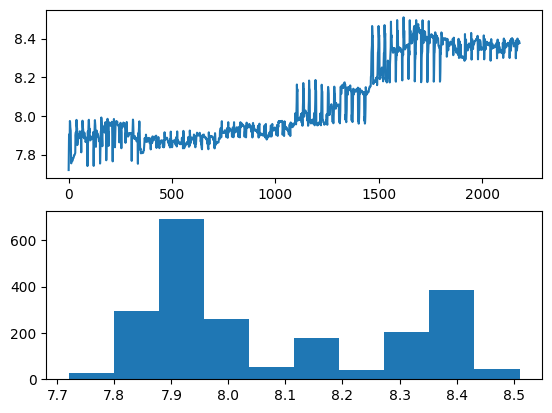

In [ ]:
dataframe_l = DataFrame(data.values)
dataframe_l.columns = ['price']
dataframe_l['price'] = log(dataframe_l['price'])

# line plot
pyplot.subplot(211)
pyplot.plot(dataframe_l['price'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe_l['price'])
pyplot.show() 

In [ ]:
adfuller_test(dataframe_l)

ADF Test Statistic : -0.45721442566160025
p-value : 0.9000988774460847
Lags Used : 26
Number of Observation Used : 2155
weak evidence against null hypothesis, time series has a unit root, indicating it is non stationary


###Differencing

In [ ]:
data['Price 1st difference'] = data['price'] - data['price'].shift(1)

In [ ]:
data

,price,Price 1st difference
date,,
2016-01-01,2252.60,NaN
2016-01-02,2454.50,201.90
2016-01-03,2708.10,253.60
2016-01-04,2577.80,-130.30
2016-01-05,2597.75,19.95
...,...,...
2021-12-17,4394.40,-5.40
2021-12-18,4389.50,-4.90
2021-12-19,4389.50,0.00


In [ ]:
## Again test dickey fuller test
adfuller_test(data['Price 1st difference'].dropna())

ADF Test Statistic : -21.664542127246378
p-value : 0.0
Lags Used : 26
Number of Observation Used : 2154
strong evidence against the null hypothesis(H0), reject the null hypothesis, Data has no unit root and is stationary


<Axes: xlabel='date'>

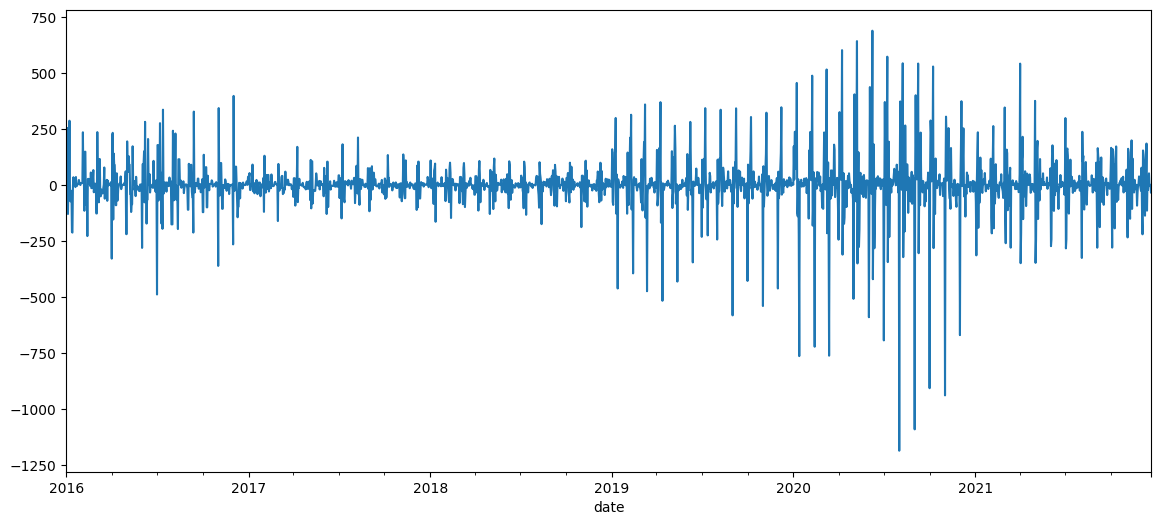

In [ ]:
data['Price 1st difference'].plot(figsize=(14,6))


In [ ]:
# Create a new column for the month
data['month'] = data.index.month

# Map the month numbers to month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data['month_name'] = data['month'].apply(lambda x: month_names[x-1])

# Convert the month_name column to a categorical data type with a specific ordering
data['month_name'] = pd.Categorical(data['month_name'], categories=month_names, ordered=True)

# Use pandas get_dummies function to create dummy variables for each month
dummy_data = pd.get_dummies(data['month_name'], prefix='', prefix_sep='')

# Concatenate the original DataFrame with the dummy variable DataFrame
data = pd.concat([data, dummy_data], axis=1)

# Remove the original month and month_name columns
data.drop(['month', 'month_name'], axis=1, inplace=True)

In [ ]:
data['t'] = range(1, len(data)+1)

In [ ]:
# Added a new column named "t_square" containing the square of the values in the "t" column
data['t_square'] = data['t'] ** 2

In [ ]:
import math

In [ ]:
# Add a new column for the logarithm of the price column
data['log_price'] = data['price'].apply(lambda x: math.log(x))

In [ ]:
data

,price,Price 1st difference,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square,log_price
date,,,,,,,,,,,,,,,,,
2016-01-01,2252.60,NaN,1,0,0,0,0,0,0,0,0,0,0,0,1,1,7.719840
2016-01-02,2454.50,201.90,1,0,0,0,0,0,0,0,0,0,0,0,2,4,7.805678
2016-01-03,2708.10,253.60,1,0,0,0,0,0,0,0,0,0,0,0,3,9,7.904003
2016-01-04,2577.80,-130.30,1,0,0,0,0,0,0,0,0,0,0,0,4,16,7.854692
2016-01-05,2597.75,19.95,1,0,0,0,0,0,0,0,0,0,0,0,5,25,7.862401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-17,4394.40,-5.40,0,0,0,0,0,0,0,0,0,0,0,1,2178,4743684,8.388086
2021-12-18,4389.50,-4.90,0,0,0,0,0,0,0,0,0,0,0,1,2179,4748041,8.386971
2021-12-19,4389.50,0.00,0,0,0,0,0,0,0,0,0,0,0,1,2180,4752400,8.386971


In [ ]:
Train = data.head(1746)
Test = data.tail(436)   

In [ ]:
#Linear Model
import numpy as np
import statsmodels.formula.api as smf 

linear_model = smf.ols('price~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['price'])-np.array(pred_linear))**2)) 
rmse_linear

333.66309736323944

In [ ]:
#Exponential

Exp = smf.ols('log_price~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['price'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp 


335.1538518896146

In [ ]:
#Quadratic 

Quad = smf.ols('price~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['price'])-np.array(pred_Quad))**2))
rmse_Quad

1040.557729319416

In [ ]:
#Additive seasonality 

add_sea = smf.ols('price~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['price'])-np.array(pred_add_sea))**2))
rmse_add_sea

1297.5568520012102

In [ ]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('price~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['price'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

999.2202601722654

In [ ]:
#Multiplicative Seasonality

Mul_sea = smf.ols('log_price~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['price'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1334.9403816354957

In [ ]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_price~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['price'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

394.68035355442225

In [ ]:
#Compare the results 

data2 = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data2)
table_rmse.sort_values(['RMSE_Values']) 


,MODEL,RMSE_Values
0,rmse_linear,333.663097
1,rmse_Exp,335.153852
6,rmse_Mult_add_sea,394.680354
4,rmse_add_sea_quad,999.220260
2,rmse_Quad,1040.557729
3,rmse_add_sea,1297.556852
5,rmse_Mult_sea,1334.940382


## Spilt Data into Training and Testing

In [ ]:
train=data.head(1746)
test=data.tail(436)
print(train.shape,test.shape)

(1746, 17) (436, 17)


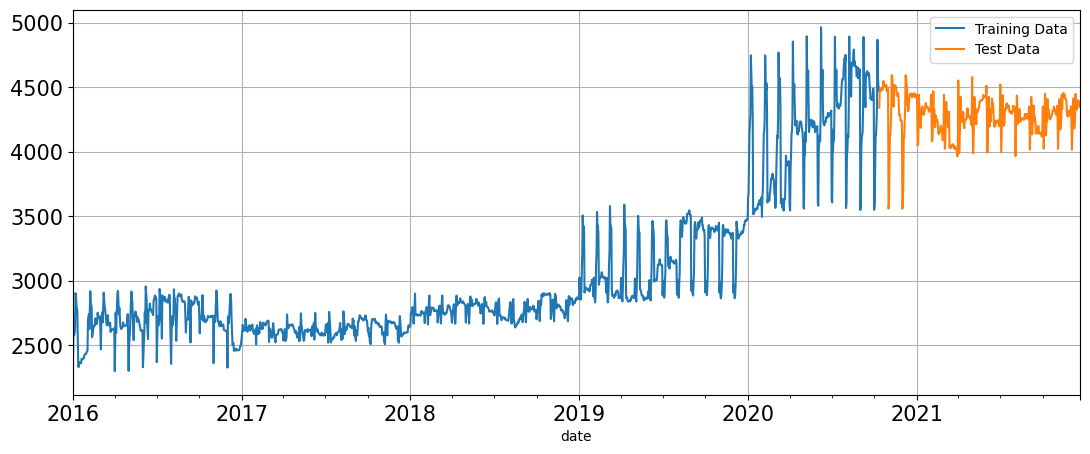

In [ ]:
train['price'].plot(figsize=(13,5),fontsize = 15)
test['price'].plot(figsize=(13,5),fontsize = 15)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Liner Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
train_time = [i+i for i in range(len(train))]
test_time = [i+len(train)+i for i in range(len(test))]
len(train_time), len(test_time)

(1746, 436)

In [ ]:
LR_train = train.copy()
LR_test = test.copy()

In [ ]:
LR_train['time']=train_time
LR_test['time']=test_time

In [ ]:
lr = LinearRegression()
lr.fit(LR_train[['time']],LR_train['price'].values)

LinearRegression()

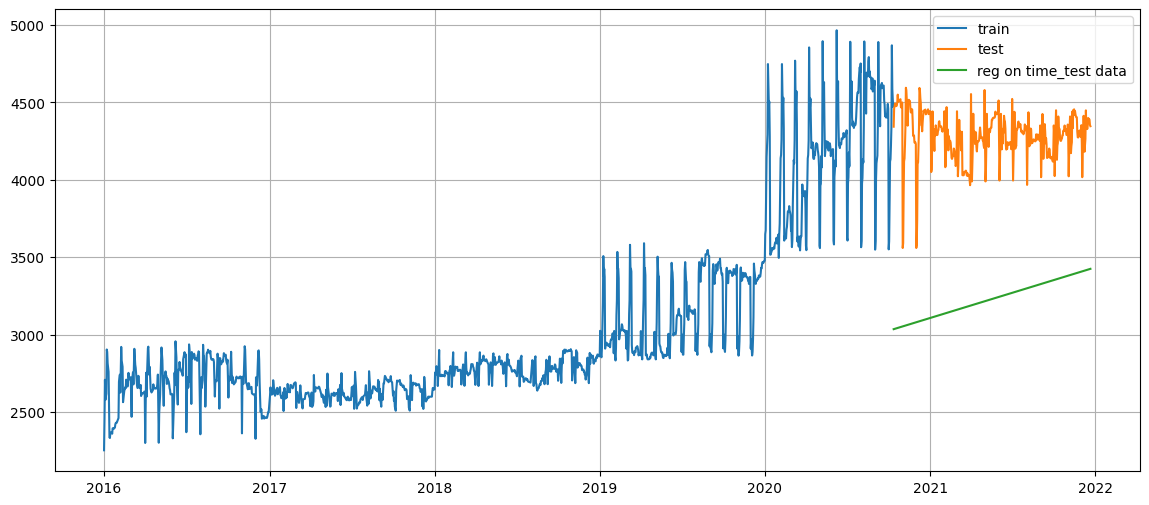

In [ ]:
test_predictions_model1 = lr.predict(LR_test[['time']])
LR_test['forcast'] = test_predictions_model1
plt.figure(figsize = (14,6))
plt.plot(train['price'], label = 'train')
plt.plot(test['price'], label = 'test')
plt.plot(LR_test['forcast'], label = 'reg on time_test data')
plt.legend(loc = 'best')
plt.grid();

In [ ]:
# Make predictions on the test data
lr_predictions = lr.predict(LR_test[['time']])


In [ ]:
# Evaluate the model
mse = mean_squared_error(lr_predictions, LR_test['price'])
rmse_lr = sqrt(mse)
print("RMSE:", rmse_lr)

RMSE: 1072.1387087539758


# Naive Forcast

In [ ]:
Naive_train = train.copy()
Naive_test = test.copy()

In [ ]:
Naive_test['naive'] = np.asarray(train['price'])[len(np.asarray(train['price']))-1]
Naive_test['naive'].head()

date
2020-10-12    4473.6
2020-10-13    4473.6
2020-10-14    4473.6
2020-10-15    4473.6
2020-10-16    4473.6
Name: naive, dtype: float64

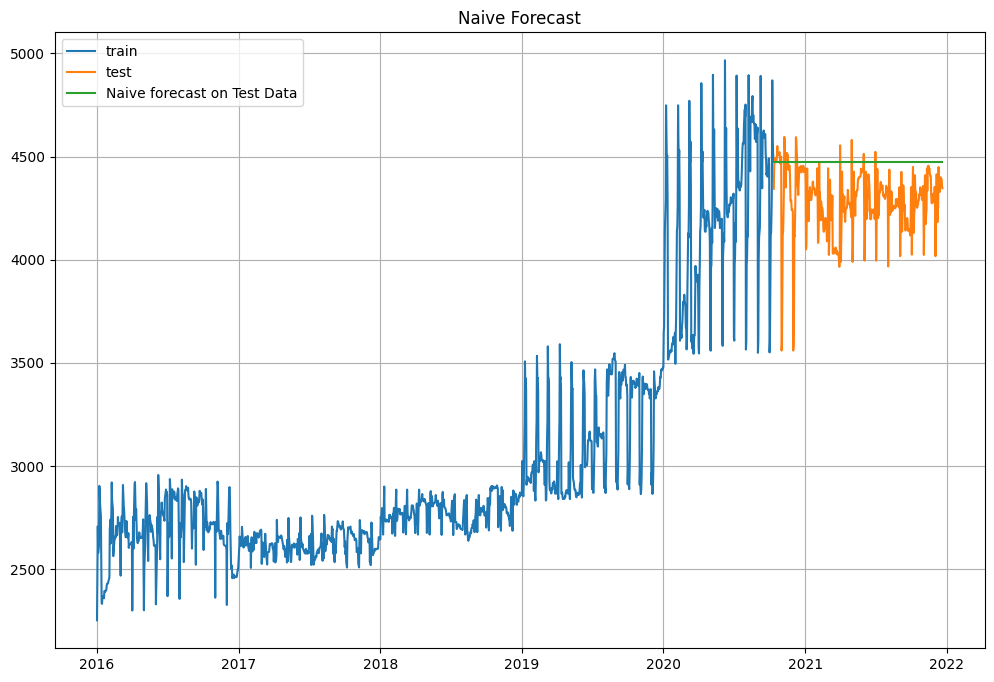

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(train['price'], label='train')
plt.plot(test['price'], label='test')
plt.plot(Naive_test['naive'], label='Naive forecast on Test Data')
plt.legend(loc='upper left')
plt.title("Naive Forecast")
plt.grid()

In [ ]:
# Get the last observed value from the train set
last_observed = train['price'].iloc[-1]

In [ ]:
# Create a DataFrame for test predictions
naive_predictions = pd.DataFrame({'price': [last_observed] * len(test)}, index=test.index)


In [ ]:
# Evaluate the model
mse = mean_squared_error(naive_predictions['price'], test['price'])
rmse_naive = sqrt(mse)
print("RMSE:", rmse_naive)

RMSE: 239.78769384450527


# ARIMA Model

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 30.8 MB/s eta 0:00:00


Figur Out Order for ARIMA Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [ ]:
stepwise_fit = auto_arima(data['price'],trace=True,suppress_warning=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26623.835, Time=2.88 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26849.714, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26851.587, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26851.536, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26847.869, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26631.605, Time=2.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=26635.529, Time=5.10 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=26625.835, Time=7.48 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=26625.835, Time=11.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=26662.140, Time=4.07 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=26629.134, Time=9.51 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=26633.886, Time=7.54 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=26613.890, Time=12.98 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=26592.618, Time=13.15 sec
 ARIMA(4,1,2)(0,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2182
Model:               SARIMAX(5, 1, 5)   Log Likelihood              -13266.682
Date:                Thu, 18 May 2023   AIC                          26557.363
Time:                        09:40:38   BIC                          26625.613
Sample:                    01-01-2016   HQIC                         26582.313
                         - 12-21-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4785      0.573      0.835      0.404      -0.645       1.602
ar.L1         -0.5070      0.020    -25.810      0.000      -0.545      -0.468
ar.L2         -0.5473      0.023    -23.732      0.000      -0.592      -0.502
ar.L3         -0.0552      0.029     -1.933      0.053      -0.111       0.001
ar.L4          0.0378      0.022      1.734      0.083      -0.005       0.080
ar.L5          0.7611      0.017     44.008      0.000       0.727       0.795
ma.L1          0.3535      0.015     23.205      0.000       0.324       0.383
ma.L2          0.2722      0.016     16.992      0.000       0.241       0.304
ma.L3         -0.2267      0.016    -13.874      0.000      -0.259      -0.195
ma.L4         -0.2970      0.014    -20.569      0.000      -0.325      -0.269
ma.L5         -0.9187      0.012    -76.004      0.000      -0.942      -0.895
sigma2       1.19e+04    182.342     65.259      0.000    1.15e+04    1.23e+04
===================================================================================
Ljung-Box (L1) (Q):                  11.80   Jarque-Bera (JB):             36278.78
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.45   Skew:                            -1.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Train the Model


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['price'], order=(5, 1, 5))
model = model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                 1746
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -10614.007
Date:                Thu, 18 May 2023   AIC                          21250.014
Time:                        11:13:38   BIC                          21310.123
Sample:                    01-01-2016   HQIC                         21272.237
                         - 10-11-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1502      0.106      1.417      0.157      -0.058       0.358
ar.L2          0.1479      0.122      1.216      0.224      -0.090       0.386
ar.L3         -0.5539      0.110     -5.022      0.000      -0.770      -0.338
ar.L4          0.1418      0.087      1.632      0.103      -0.028       0.312
ar.L5          0.3423      0.073      4.682      0.000       0.199       0.486
ma.L1         -0.2521      0.099     -2.547      0.011      -0.446      -0.058
ma.L2         -0.3687      0.123     -2.993      0.003      -0.610      -0.127
ma.L3          0.6256      0.097      6.427      0.000       0.435       0.816
ma.L4         -0.2382      0.077     -3.106      0.002      -0.389      -0.088
ma.L5         -0.6403      0.077     -8.284      0.000      -0.792      -0.489
sigma2      1.191e+04    176.419     67.499      0.000    1.16e+04    1.23e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):             40156.87
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               4.28   Skew:                            -1.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Make Predictions on Test Set


In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)

2020-10-12    4487.946539
2020-10-13    4451.070537
2020-10-14    4413.956783
2020-10-15    4358.991000
2020-10-16    4402.637903
                 ...     
2021-12-17    4396.570337
2021-12-18    4396.570337
2021-12-19    4396.570337
2021-12-20    4396.570337
2021-12-21    4396.570337
Freq: D, Name: predicted_mean, Length: 436, dtype: float64


<Axes: xlabel='date'>

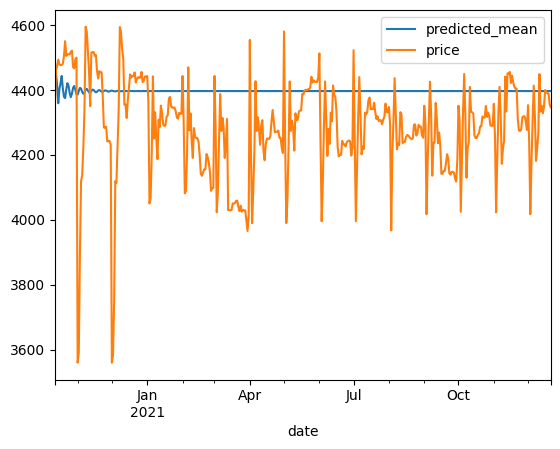

In [ ]:
pred.plot(legend=True)
test['price'].plot(legend=True)

In [ ]:
test['price'].mean()

4284.703211009174

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_ARIMA=sqrt(mean_squared_error(pred,test['price']))
print(rmse_ARIMA)

185.32781132528788


<Axes: >

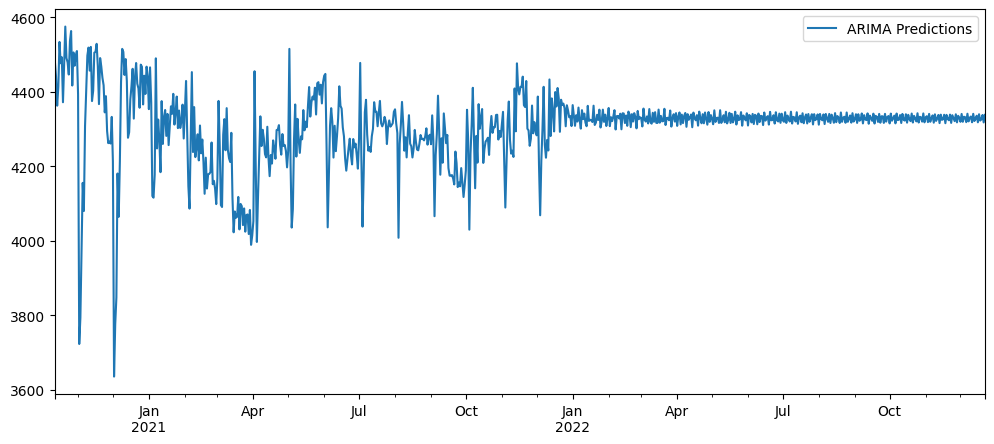

In [ ]:
pred.plot(figsize=(12,5),legend=True)

# SARIMA

In [ ]:
display(data.iloc[1745])  

price                   4.473600e+03
Price 1st difference   -4.570000e+01
Jan                     0.000000e+00
Feb                     0.000000e+00
Mar                     0.000000e+00
Apr                     0.000000e+00
May                     0.000000e+00
Jun                     0.000000e+00
Jul                     0.000000e+00
Aug                     0.000000e+00
Sep                     0.000000e+00
Oct                     1.000000e+00
Nov                     0.000000e+00
Dec                     0.000000e+00
t                       1.746000e+03
t_square                3.048516e+06
log_price               8.405949e+00
Name: 2020-10-11 00:00:00, dtype: float64

In [ ]:
# split the data into train and test sets
train1 = data.loc[:'2020-10-11', 'price']
test1 = data.loc['2020-10-11':, 'price']

# define the SARIMA model
model = SARIMAX(train1, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12), trend='c')

# fit the model
results = model.fit()

# make predictions for the test set
predictions = results.predict(start=test1.index[0], end=test1.index[-1])

# compute the RMSE value
rmse_sarima = np.sqrt(mean_squared_error(test1, predictions))

print('RMSE:', rmse_sarima) 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 2043.350702844044


# moving avarage

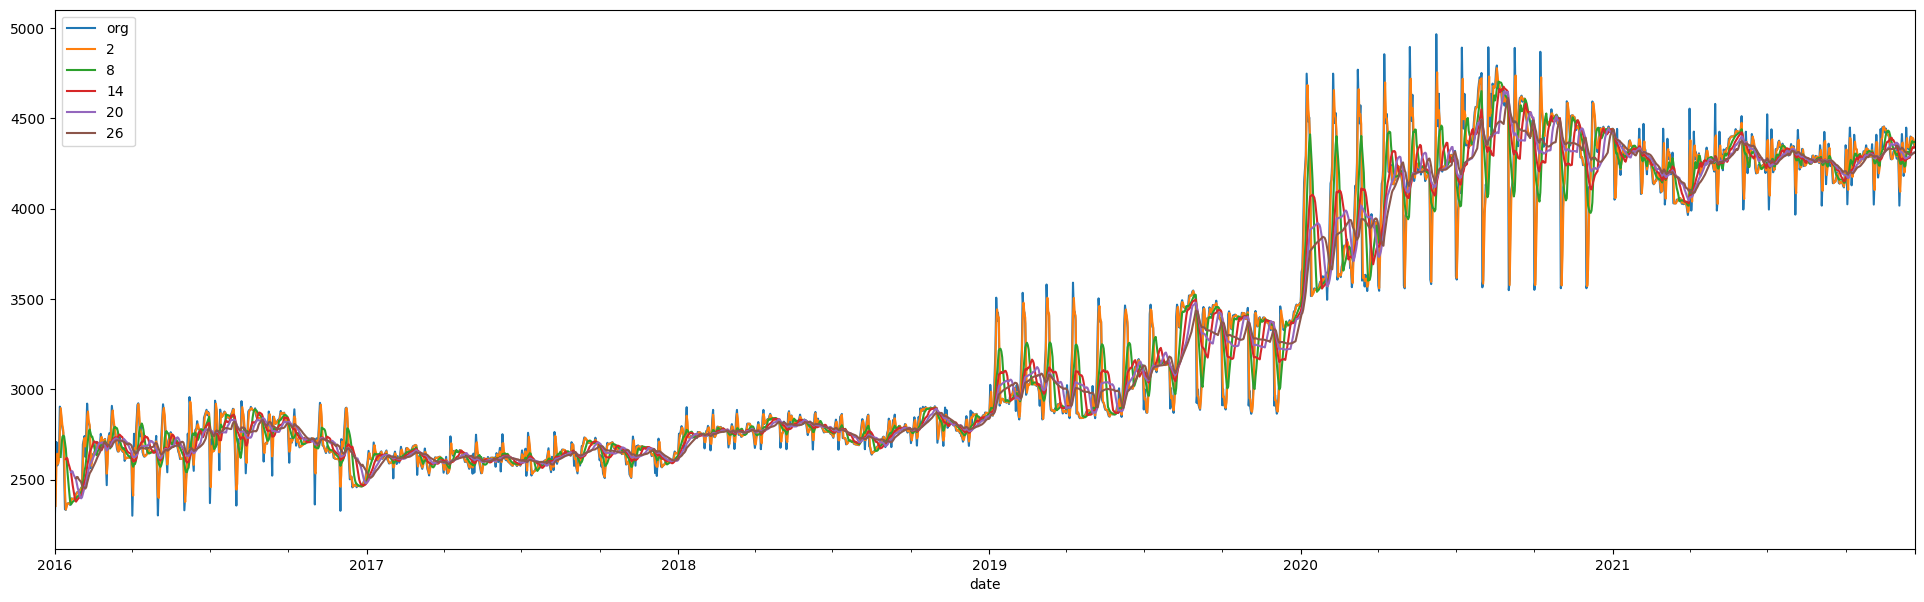

In [ ]:
plt.figure(figsize=(24,7))
data.price.plot(label="org")
for i in range(2,30,6):
    data["price"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
ses_model = SimpleExpSmoothing(train["price"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start=test.index[0], end=test.index[-1])
mse = mean_squared_error(pred_ses, test['price'])
rmse_ses_model = sqrt(mse)
print(rmse_ses_model)

194.87583382285825


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
# Holt method 
hw_model = Holt(train["price"]).fit(smoothing_level=0.8, smoothing_trend=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
mse = mean_squared_error(pred_hw, test['price'])
rmse_hw_model = sqrt(mse)
print(rmse_hw_model)

5573.507202572578


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(train["price"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
mse = mean_squared_error(pred_hwe_add_add, test['price'])
rmse_hwe_model_add_add = sqrt(mse)
print(rmse_hwe_model_add_add)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


1505.5398653723428


In [ ]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(train["price"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
mse = mean_squared_error(pred_hwe_mul_add, test['price'])
rmse_hwe_model_mul_add= sqrt(mse)
print(rmse_hwe_model_mul_add)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


1154.139071797108


In [ ]:
#Compare the results 

data3 = {"MODEL":pd.Series(["ARIMA","SimpleExpSmoothing","hw_model","hwe_model_add_add","hwe_model_mul_add","Linear reression","Naive forecast","SARIMA","rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_ARIMA,rmse_ses_model,rmse_hw_model,rmse_hwe_model_add_add,rmse_hwe_model_mul_add,rmse_lr,rmse_naive,rmse_sarima,rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data3)
table_rmse.sort_values(['RMSE_Values'],inplace=True, ignore_index=True) 
table_rmse


,MODEL,RMSE_Values
0,ARIMA,185.327811
1,SimpleExpSmoothing,194.875834
2,Naive forecast,239.787694
3,rmse_linear,333.663097
4,rmse_Exp,335.153852
5,rmse_Mult_add_sea,394.680354
6,rmse_add_sea_quad,999.220260
7,rmse_Quad,1040.557729
8,Linear reression,1072.138709
9,hwe_model_mul_add,1154.139072


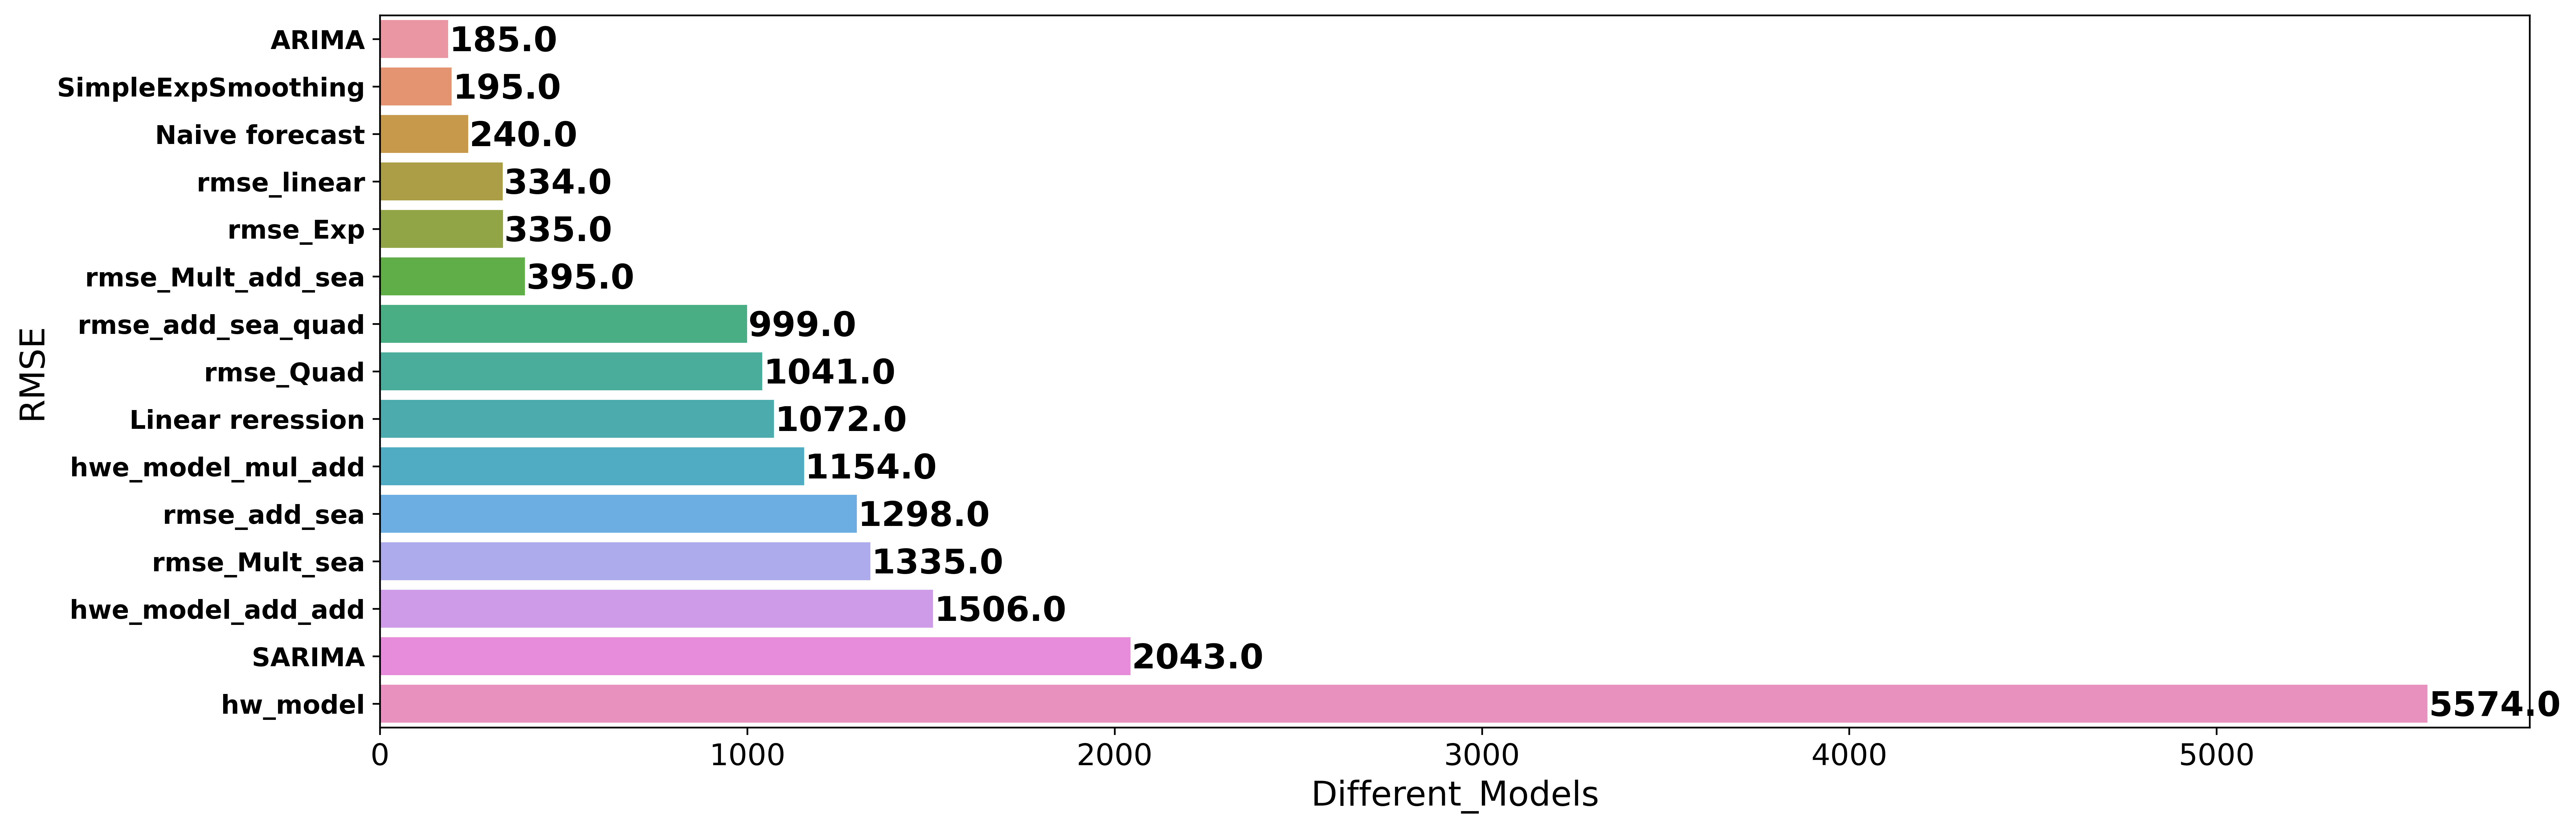

In [ ]:
f, axe = plt.subplots(1,1, figsize=(18,6), dpi=500)
sn.barplot(x='RMSE_Values', y='MODEL', data=table_rmse, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=14)


for i, v in enumerate(np.round(table_rmse.RMSE_Values.values,0)):
    axe.text(v + 3, i + .25, str(v),
            color = 'black', fontweight = 'bold', fontsize= 16)

plt.show()

#Predict for future

In [ ]:
model2=ARIMA(data['price'],order=(5,1,5))
model2=model2.fit()
data.tail()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  

,price,Price 1st difference,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square,log_price
date,,,,,,,,,,,,,,,,,
2021-12-17,4394.4,-5.4,0,0,0,0,0,0,0,0,0,0,0,1,2178,4743684,8.388086
2021-12-18,4389.5,-4.9,0,0,0,0,0,0,0,0,0,0,0,1,2179,4748041,8.386971
2021-12-19,4389.5,0.0,0,0,0,0,0,0,0,0,0,0,0,1,2180,4752400,8.386971
2021-12-20,4354.1,-35.4,0,0,0,0,0,0,0,0,0,0,0,1,2181,4756761,8.378873
2021-12-21,4346.5,-7.6,0,0,0,0,0,0,0,0,0,0,0,1,2182,4761124,8.377126


In [ ]:
pred = model2.predict(start-len(data),end=len(data)+365,typ='levels').rename("ARIMA Predictions")
print(pred)

2020-10-12    4482.717682
2020-10-13    4440.950217
2020-10-14    4363.064622
2020-10-15    4413.739858
2020-10-16    4534.314840
                 ...     
2022-12-18    4323.138561
2022-12-19    4326.583338
2022-12-20    4338.119704
2022-12-21    4318.161410
2022-12-22    4338.351967
Freq: D, Name: ARIMA Predictions, Length: 802, dtype: float64


In [ ]:
filtered_pred = pred.loc['2021-12-22':'2022-01-22']

In [ ]:
filtered_pred

2021-12-22    4378.985997
2021-12-23    4364.963942
2021-12-24    4368.645450
2021-12-25    4356.633355
2021-12-26    4307.756279
2021-12-27    4364.164730
2021-12-28    4350.368946
2021-12-29    4332.025893
2021-12-30    4335.266285
2021-12-31    4308.345669
2022-01-01    4364.627429
2022-01-02    4337.865723
2022-01-03    4309.029552
2022-01-04    4337.388006
2022-01-05    4320.440175
2022-01-06    4357.963048
2022-01-07    4324.197316
2022-01-08    4301.485547
2022-01-09    4351.019122
2022-01-10    4326.974207
2022-01-11    4341.884379
2022-01-12    4317.671380
2022-01-13    4307.887347
2022-01-14    4362.637531
2022-01-15    4322.159303
2022-01-16    4325.236720
2022-01-17    4323.668734
2022-01-18    4319.231874
2022-01-19    4363.010652
2022-01-20    4311.266978
2022-01-21    4317.615977
2022-01-22    4338.546409
Freq: D, Name: ARIMA Predictions, dtype: float64

<Axes: >

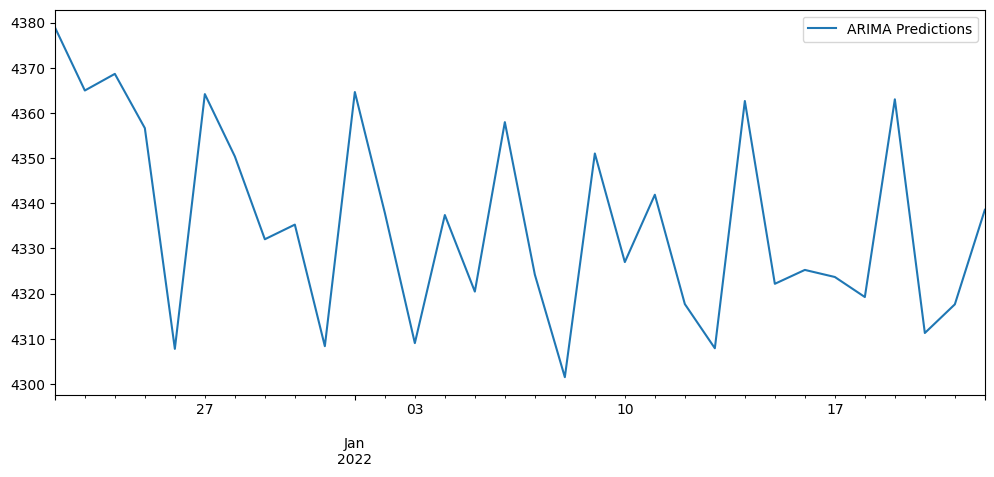

In [ ]:
filtered_pred.plot(figsize=(12,5),legend=True)

In [ ]:
filtered_pred = pred.loc['2021-12-22':'2022-12-22']

In [ ]:
filtered_pred

2021-12-22    4378.985997
2021-12-23    4364.963942
2021-12-24    4368.645450
2021-12-25    4356.633355
2021-12-26    4307.756279
                 ...     
2022-12-18    4323.138561
2022-12-19    4326.583338
2022-12-20    4338.119704
2022-12-21    4318.161410
2022-12-22    4338.351967
Freq: D, Name: ARIMA Predictions, Length: 366, dtype: float64

<Axes: >

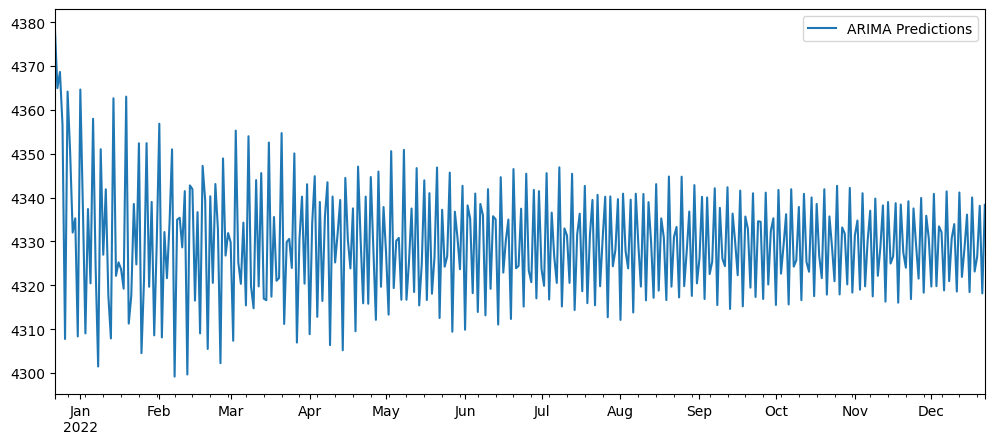

In [ ]:
filtered_pred.plot(figsize=(12,5),legend=True)

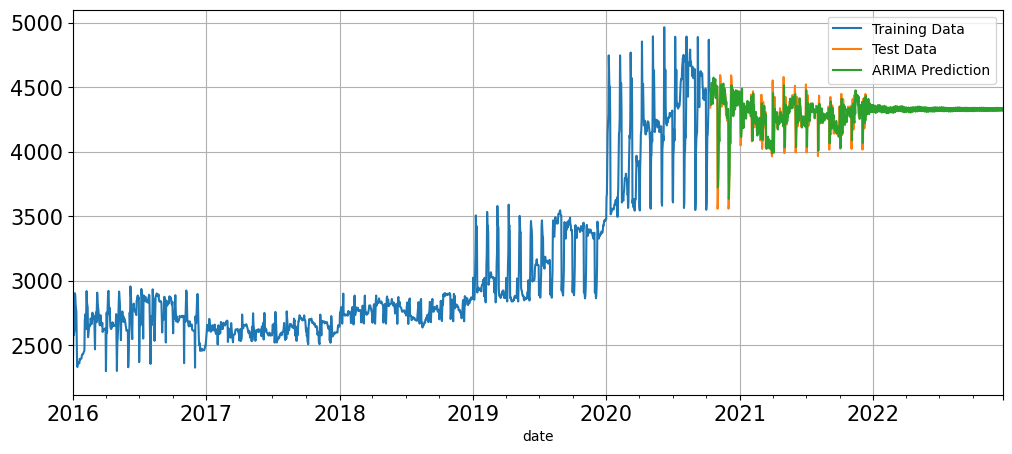

In [ ]:
train['price'].plot(figsize=(13,5),fontsize = 15)
test['price'].plot(figsize=(13,5),fontsize = 15)
pred.plot(figsize=(12,5))
plt.grid()
plt.legend(['Training Data','Test Data','ARIMA Prediction'])
plt.show()